In [2]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 2s 0us/step


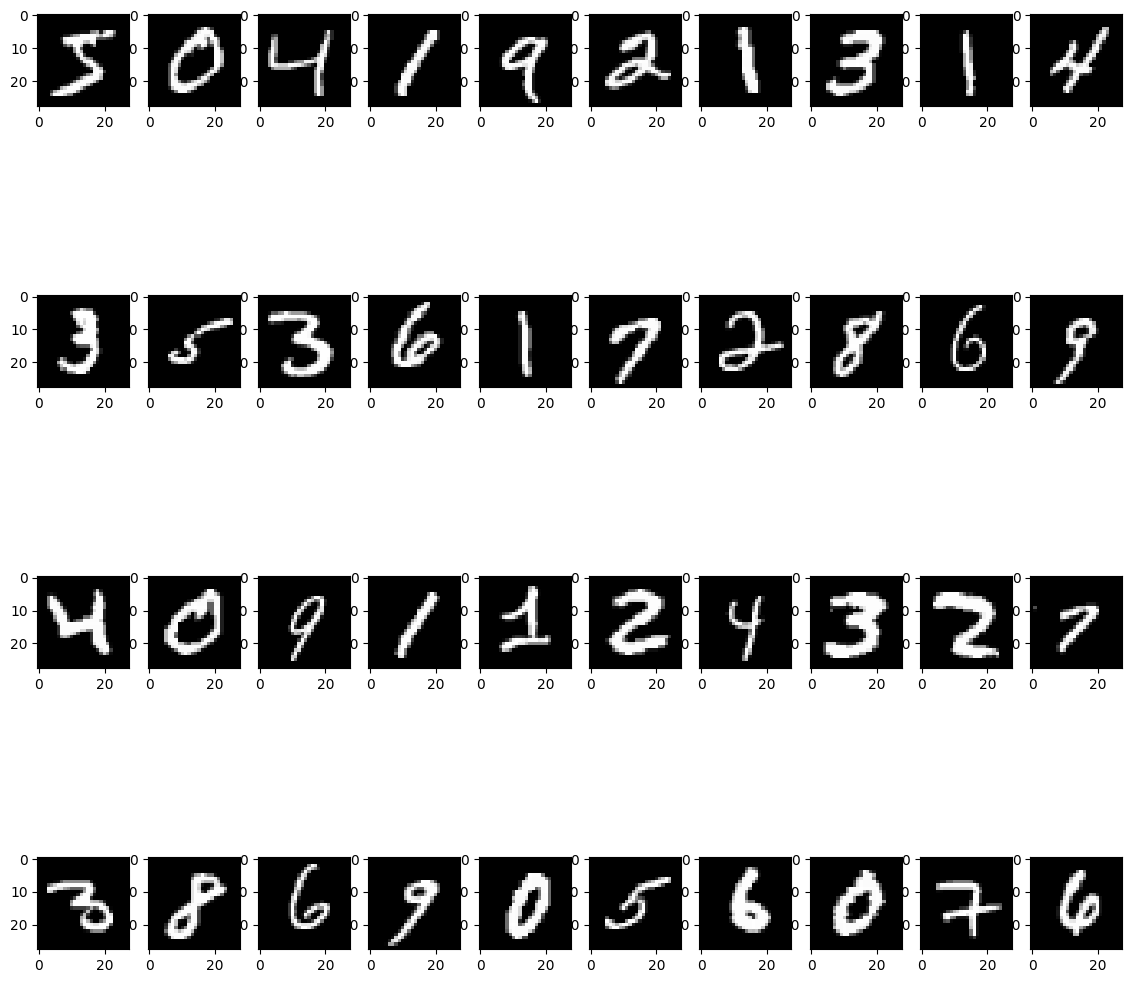

In [3]:
# MNIST veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Veri görselleştirme
plt.figure(figsize=(14,14))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [4]:
# Veri ön işleme
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Sınıf vektörlerini kategorik hale getirme
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# AlexNet modelinin tanımlanması
model = Sequential()

# 1. Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), strides=(4,4), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2. Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3. Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())

# 4. Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())

# 5. Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Flattening
model.add(Flatten())

# 1. Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# 2. Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# 3. Fully Connected Layer
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(10, activation='softmax'))

In [6]:
# Modelin derlenmesi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modelin eğitilmesi
history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 26s 25ms/step - loss: 0.2443 - accuracy: 0.9255 - val_loss: 1.4956 - val_accuracy: 0.6026
Epoch 2/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0898 - accuracy: 0.9734 - val_loss: 0.1318 - val_accuracy: 0.9607
Epoch 3/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0667 - accuracy: 0.9808 - val_loss: 0.0562 - val_accuracy: 0.9842
Epoch 4/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.1050 - val_accuracy: 0.9732
Epoch 5/30
469/469 [==============================] - 11s 24ms/step - loss: 0.0486 - accuracy: 0.9861 - val_loss: 0.0741 - val_accuracy: 0.9792
Epoch 6/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0417 - accuracy: 0.9878 - val_loss: 0.0677 - val_accuracy: 0.9798
Epoch 7/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0362 - accuracy: 0.9895 - val_loss: 0.0661 - val_accuracy:

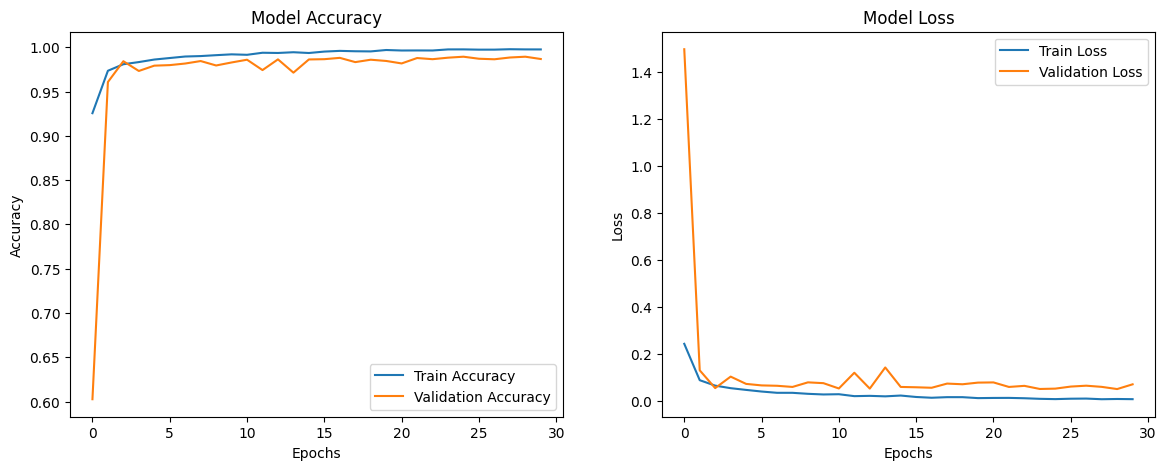

313/313 [==============================] - 2s 5ms/step


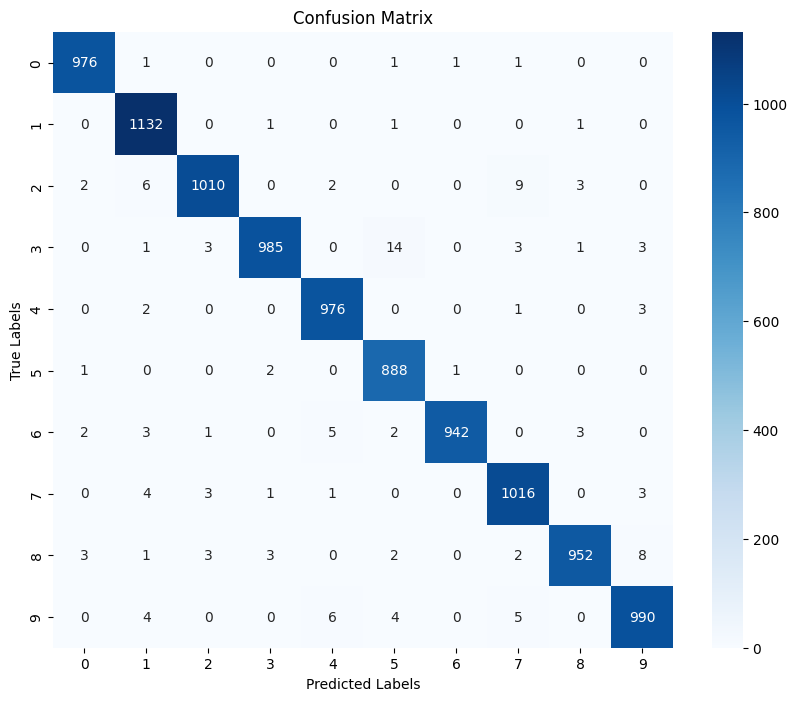

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Eğitim ve doğrulama doğruluğu ile kayıplarının saklanması
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Sonuçların görselleştirilmesi
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Confusion matrix hesaplanması
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) # tahmin edilen sınıf etiketi elde edildi
y_true = np.argmax(y_test, axis=1) # gerçek sınıf etiketi

conf_matrix = confusion_matrix(y_true, y_pred_classes) # hesaplama

# Confusion matrix görsellştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
